In [1]:
# importing all the required libraries for Analysizing tghe Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Collection and Data Cleaning

In [2]:
# import the csv file from internal drive to the current notebook.\
# Create a dataframe for the imported data.
weather_df_1 = pd.read_csv(r"weather.csv")

In [3]:
weather_df_1.sample(4)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
327,7.8,16.2,17.4,6.4,7.9,NW,50.0,NW,N,15.0,...,44,1016.7,1017.8,7,1,8.0,14.3,Yes,0.0,No
360,7.9,26.1,0.0,6.8,3.5,NNW,43.0,NaN,WNW,0.0,...,20,1017.6,1014.2,5,8,16.3,25.9,No,0.0,No
74,16.0,22.8,0.0,12.4,6.0,E,50.0,E,ENE,13.0,...,57,1012.3,1012.3,8,6,17.0,21.6,No,0.0,No
292,-5.3,13.1,0.0,2.2,7.9,NW,33.0,N,NNW,4.0,...,47,1029.6,1025.6,6,6,0.1,12.2,No,0.0,No


In [4]:
# Define the leap year
leap_year = 2024

# Create a Series with leap year dates and month names
date_range = pd.date_range(start=f'{leap_year}-01-01', end=f'{leap_year}-12-31', freq='D')
leap_year_series = pd.Series(date_range.strftime('%B'), name='LeapYearMonthNames')

# Create a DataFrame and add the Series
df = pd.DataFrame({'Date': date_range, 'MonthNames': leap_year_series})

# Display the DataFrame
print(df)

          Date MonthNames
0   2024-01-01    January
1   2024-01-02    January
2   2024-01-03    January
3   2024-01-04    January
4   2024-01-05    January
..         ...        ...
361 2024-12-27   December
362 2024-12-28   December
363 2024-12-29   December
364 2024-12-30   December
365 2024-12-31   December

[366 rows x 2 columns]


In [5]:
weather_df=pd.concat([df,weather_df_1],axis=1)
weather_df

,Date,MonthNames,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2024-01-01,January,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2024-01-02,January,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2024-01-03,January,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2024-01-04,January,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2024-01-05,January,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,December,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2024-12-28,December,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2024-12-29,December,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2024-12-30,December,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [6]:
# visualizing the raw dataset.
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           366 non-null    datetime64[ns]
 1   MonthNames     366 non-null    object        
 2   MinTemp        366 non-null    float64       
 3   MaxTemp        366 non-null    float64       
 4   Rainfall       366 non-null    float64       
 5   Evaporation    366 non-null    float64       
 6   Sunshine       363 non-null    float64       
 7   WindGustDir    363 non-null    object        
 8   WindGustSpeed  364 non-null    float64       
 9   WindDir9am     335 non-null    object        
 10  WindDir3pm     365 non-null    object        
 11  WindSpeed9am   359 non-null    float64       
 12  WindSpeed3pm   366 non-null    int64         
 13  Humidity9am    366 non-null    int64         
 14  Humidity3pm    366 non-null    int64         
 15  Pressure9am    366 non-

In [7]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Date']

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
361   2024-12-27
362   2024-12-28
363   2024-12-29
364   2024-12-30
365   2024-12-31
Name: Date, Length: 366, dtype: datetime64[ns]

In [8]:
# checking for any null values in the dataframe.
weather_df.isnull().sum()

Date              0
MonthNames        0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [9]:
# Checking the basic statistics of the data.
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [10]:
# Checking for any duplicate values in the dataset.
weather_df.duplicated().sum()

0

In [11]:
# filling all the null values

In [12]:
weather_df['WindDir9am'].fillna('ffill',inplace=True)
weather_df['WindDir3pm'].fillna('ffill',inplace=True)
weather_df['WindGustDir'].fillna('ffill',inplace=True)

In [13]:
sunshine_mean=weather_df['Sunshine'].mean()
weather_df['Sunshine'].fillna(sunshine_mean,inplace=True)

In [14]:
Wind_Gust_Speed_mean=weather_df['WindGustSpeed'].mean()
weather_df['WindGustSpeed'].fillna(Wind_Gust_Speed_mean,inplace=True)

In [15]:
WindSpeed9am_mean=weather_df.WindSpeed9am.mean()
weather_df['WindSpeed9am'].fillna(WindSpeed9am_mean,inplace=True)

In [16]:
weather_df.isnull().sum()

Date             0
MonthNames       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [17]:
weather_df['Date']

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
361   2024-12-27
362   2024-12-28
363   2024-12-29
364   2024-12-30
365   2024-12-31
Name: Date, Length: 366, dtype: datetime64[ns]

## EDA

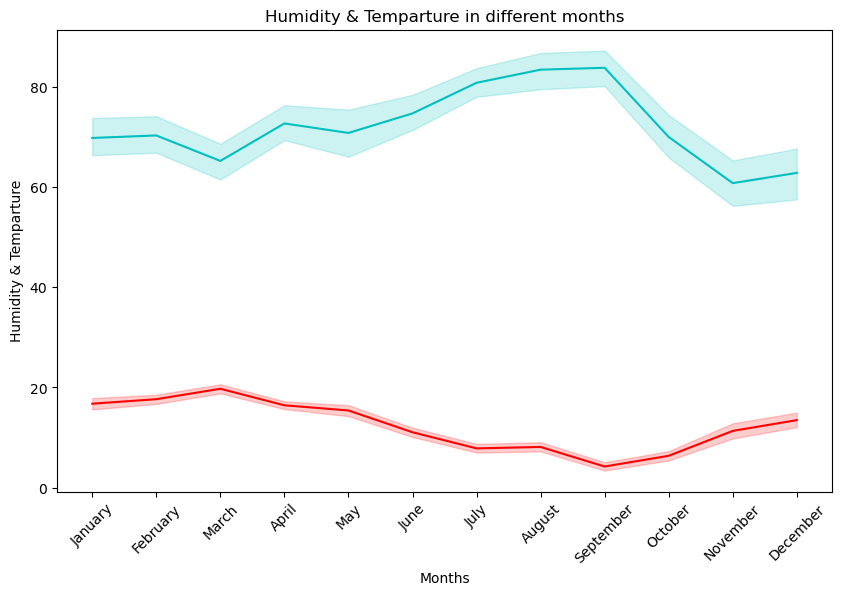

In [31]:

plt.figure(figsize=(10,6))
sns.lineplot(data=weather_df, x="MonthNames", y="Humidity9am",color = 'c')
plt.xticks(rotation = 45)
sns.lineplot(data=weather_df, x="MonthNames", y="Temp9am",color = 'r')
plt.xlabel("Months")
plt.ylabel("Humidity & Temparture")
plt.title("Humidity & Temparture in different months")
plt.show()

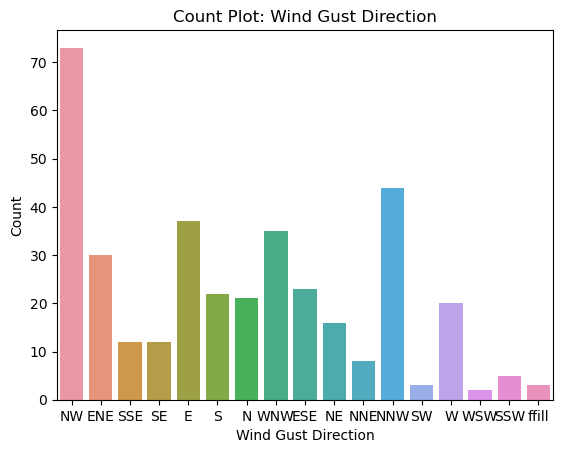

In [33]:
sns.countplot(x='WindGustDir', data=weather_df)
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.title('Count Plot: Wind Gust Direction')
plt.show()

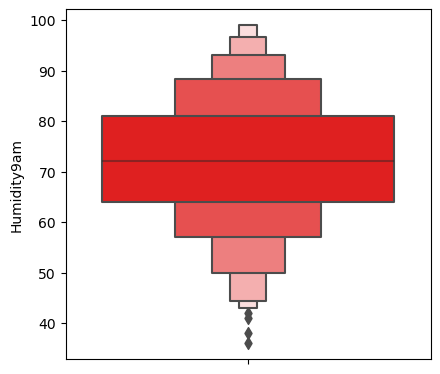

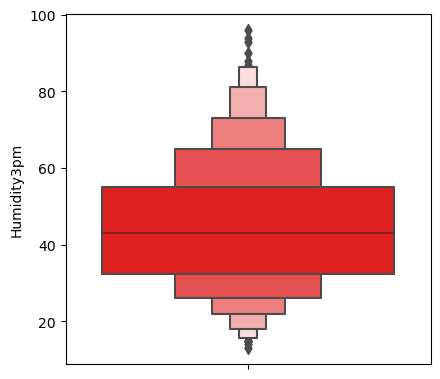

In [21]:
# Using box plot to check for any outliers in the data.
plt.figure(figsize=(16,10))
plt.subplot(231)
sns.boxenplot(data = weather_df, y = 'Humidity9am', color = 'r')

plt.figure(figsize=(16,10))
plt.subplot(232)
sns.boxenplot(data = weather_df, y = 'Humidity3pm', color = 'r')
plt.show()

## Correlation and Regression Analysis:
- Performing correlation analysis to identify relationships between different weather parameters.
- Implementoing regression analysis to predict one weather parameter based on others.

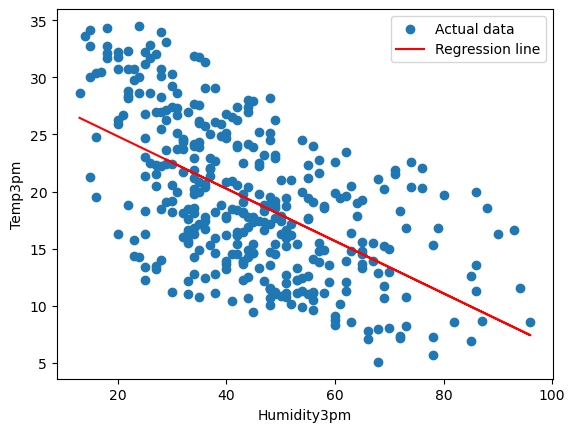

In [22]:

# Sample data
X = weather_df[['Humidity3pm']]
Y = weather_df['Temp3pm']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, Y, label='Actual data')
plt.plot(X, predictions, label='Regression line', color='red')
plt.xlabel('Humidity3pm')
plt.ylabel('Temp3pm')
plt.legend()
plt.show()

In [23]:
correlation_matrix  = weather_df.corr()
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,0.217224,0.126251,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,0.109415,-0.214649,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.096160,0.218979,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,0.287709,0.068176,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,0.095676,-0.064200,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.378081
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,1.000000,0.518508,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.251912
WindSpeed9am,0.126251,-0.214649,0.218979,0.068176,-0.064200,0.518508,1.000000,0.467090,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.039048
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072494,0.693641,0.467090,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497692,-0.349433,-0.267654,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.755186,-0.069432,0.145866,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


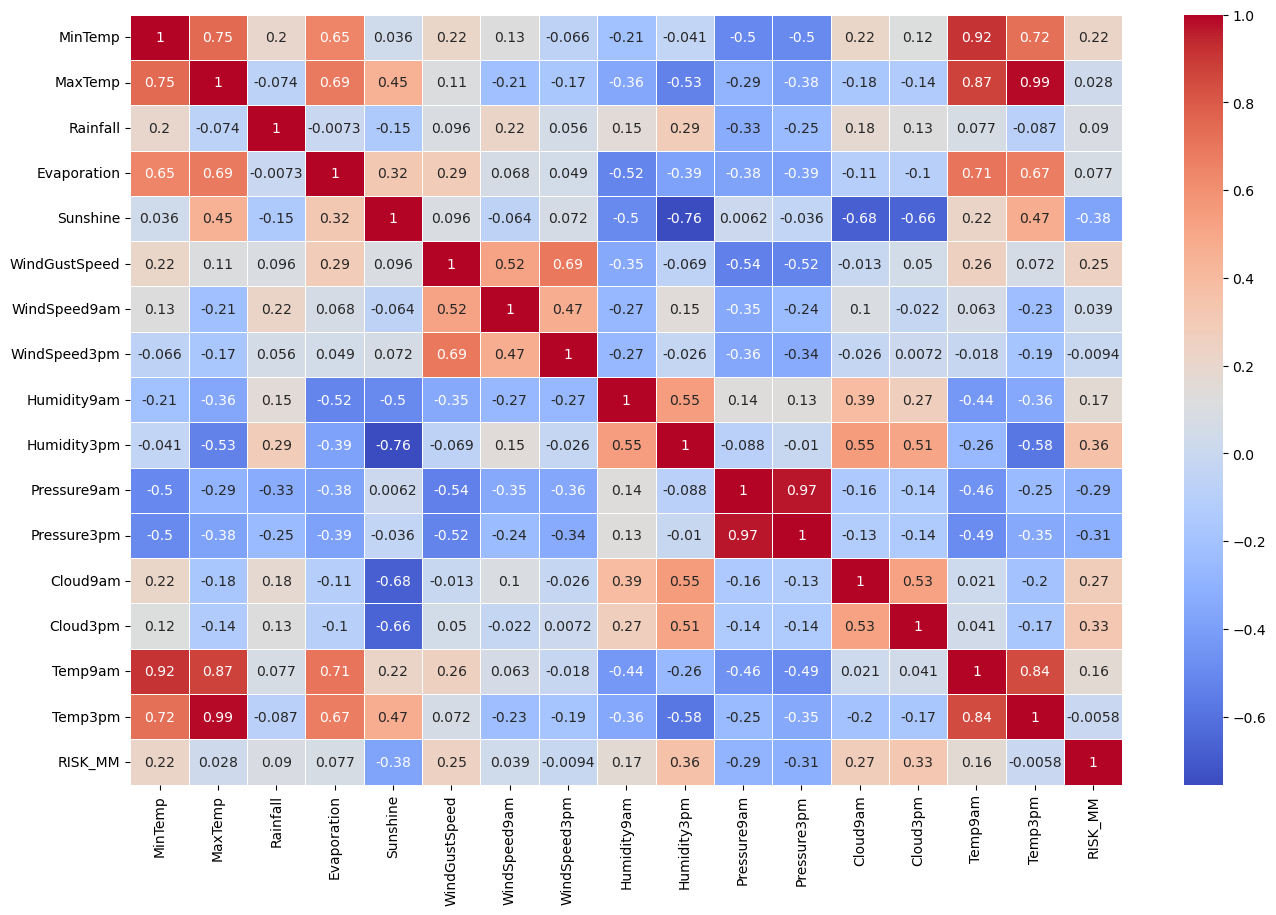

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()